In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\Basudev\\Downloads\\Datasets\\datascienceforbusiness-master")

In [2]:
df = pd.read_excel('OnlineRetail.xlsx', sheet_name = 'Online Retail')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df =df.loc[df['Quantity'] > 0]

In [5]:
df = df[pd.notnull(df['CustomerID'])]

In [6]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [7]:
df['Sales'] = df['Quantity']*df['UnitPrice']

In [8]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales' : sum, 'InvoiceDate' : max})
orders_df.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [10]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales' : [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate' : [min, max, purchase_duration, avg_frequency]
})

In [11]:
summary_df.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

In [12]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.0
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.0
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.0


In [13]:
summary_df.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1.0     1539
2.0      806
3.0      515
4.0      381
5.0      228
6.0      172
7.0      132
8.0       97
9.0       60
10.0      45
11.0      54
12.0      47
13.0      29
14.0      19
15.0      24
16.0      13
17.0      15
18.0      11
19.0      15
20.0      10
Name: sales_avg, dtype: int64

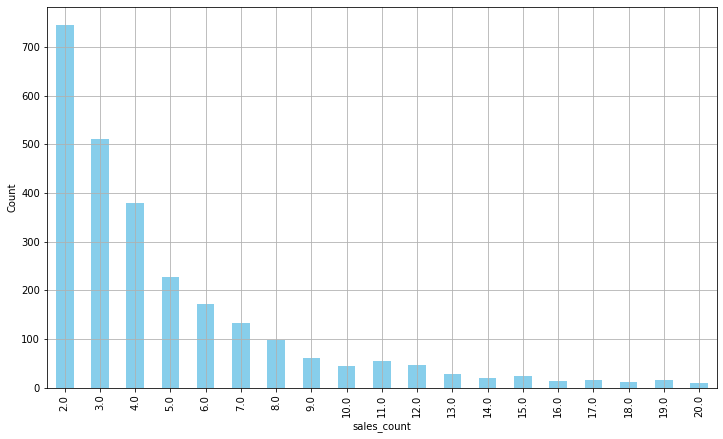

In [14]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind = 'bar',
                                                                      color = 'skyblue',
                                                                     figsize = (12, 7),
                                                                     grid = True)
ax.set_ylabel('Count')
plt.show()

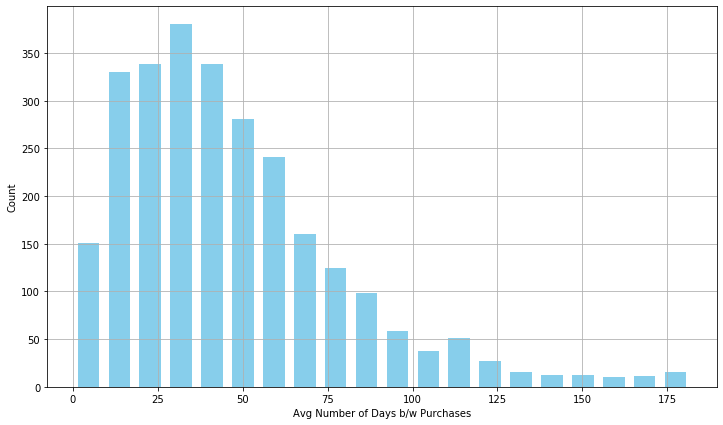

In [15]:
ax = summary_df['invoicedate_purchase_frequency'].hist(bins = 20, color = 'skyblue', rwidth = 0.7, figsize = (12, 7))
ax.set_xlabel('Avg Number of Days b/w Purchases')
ax.set_ylabel('Count')
plt.show()

In [16]:
orders_df.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [21]:
clv_freq = '3M'
data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key = 'InvoiceDate', freq = clv_freq)]).agg({
    'Sales' : [sum, groupby_mean, groupby_count],
})
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


In [27]:
date_month_map = {str(x)[:10]: 'M_%s' % (i + 1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse = True))}

In [29]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [30]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2


In [31]:
data_df['M'].unique()

array(['M_4', 'M_5', 'M_3', 'M_2', 'M_1'], dtype=object)

In [32]:
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values = ['sales_sum', 'sales_avg', 'sales_count'], 
                            columns = 'M', index = 'CustomerID')
features_df.columns = ['_'.join(col) for col in features_df.columns]
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [47]:
response_df = data_df.loc[lambda data_df: data_df['M'] == 'M_1' ]
response_df = response_df.drop(['InvoiceDate', 'sales_avg', 'sales_count', 'M'], axis=1)
response_df.columns = ['CustomerID', 'CLV_' + clv_freq]
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [48]:
sample_set_df = features_df.merge(response_df,
                                 left_index = True,
                                 right_on = 'CustomerID',
                                 how = 'left')
sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target_var = 'CLV_' +clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]
X_train, X_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size = 0.2)
reg_fit = LinearRegression()
reg_fit.fit(X_train, y_train)
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,sales_avg_M_2,0.250212
1,sales_avg_M_3,-0.759707
2,sales_avg_M_4,0.474426
3,sales_avg_M_5,-0.427240
4,sales_count_M_2,62.247881
5,sales_count_M_3,7.765955
6,sales_count_M_4,-132.302791
7,sales_count_M_5,6.599640
8,sales_sum_M_2,0.192234
9,sales_sum_M_3,0.420058


In [52]:
train_preds = reg_fit.predict(X_train)
test_preds = reg_fit.predict(X_test)

In [53]:
from sklearn.metrics import r2_score, median_absolute_error
r2_score(y_true = y_train, y_pred = train_preds)

0.7333247003369863

In [54]:
median_absolute_error(y_true = y_train, y_pred = train_preds)

213.79788318143625